# Tarea 1: Multi-armed bandits
## IELE 4922: Reinforcement Learning
## Wilmar Calderón
## 201630701


### 0. Inicialización de librerías

In [388]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Inicializaicón de los parámetros de los modelos
    #Número de los bandits (Acciones)
n_bandits=15
    #Media de las acciones q*
mean_q=10
    #Varianza de las acciones q*
variance_q=4
    #Varianza de cada acción (recompensa)
action_var=2
    #Número de pasos: horizonte
steps=5000
    #número de iteraciones (repeticiones del experimento)
iter=1000

### 1. Acerca de los multi-armed bandits

In [390]:
# Función para generar una visualización de q*(a_k)
#num_actions por definición será igual al número de bandits (entrada por parámetro para permitir la escalabilidad de la función)

def generate_q(mean, variance, num_actions, steps,step_variance):
    q_ast=np.zeros((steps,num_actions))
    q_ini=np.random.normal(mean, np.sqrt(variance), num_actions)
    for i,mean_q in enumerate(q_ini):
        q_ast[:,i]=np.random.normal(mean_q, np.sqrt(step_variance), steps)
    return q_ast

q_val=generate_q(mean_q,variance_q,n_bandits,steps,action_var)

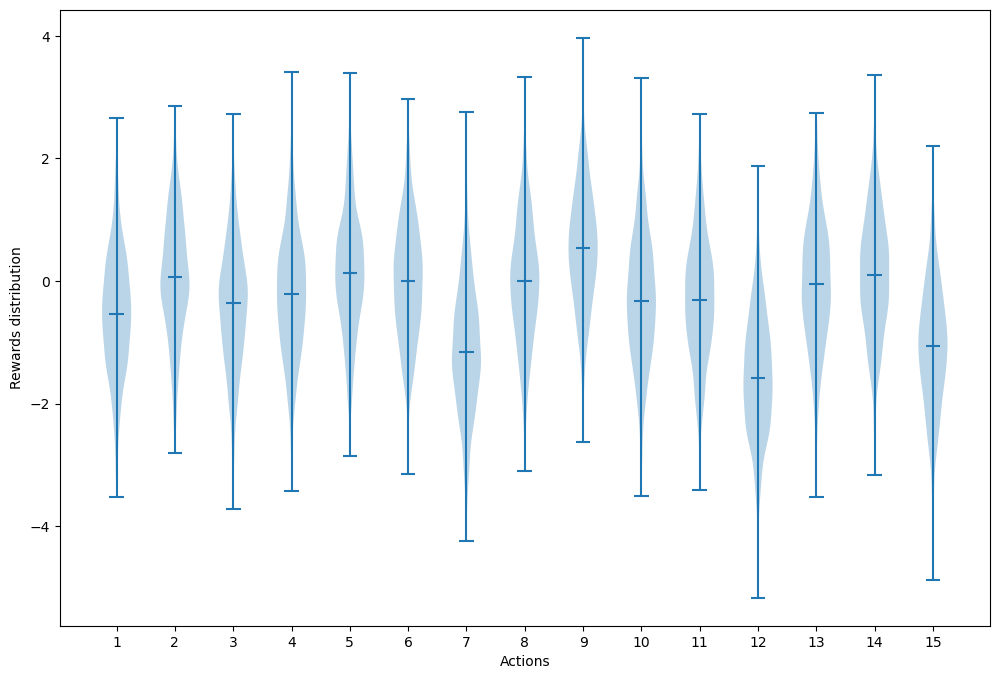

In [391]:
plt.figure(figsize=(12,8))
plt.ylabel('Rewards distribution')
plt.xlabel('Actions')
plt.xticks(range(1,n_bandits+1))

plt.violinplot(q_val, positions=range(1,n_bandits+1), showmedians=True)
plt.show()

### 1.A $\varepsilon$-greedy

In [392]:
# Función que obtiene el índice del máximo valor dentro de un arreglo (útil para calcular ese bandit que maximiza la recompensa)
# input: valores de las recompensas (arreglo)
# output: índice de la posición que corresponde al valor máximo dentro del arreglo
def arg_max(q_ast):
    arg_max_i=np.argmax(q_ast)
    if isinstance(arg_max_i, list):
        return arg_max_i[0]
    else:
        return arg_max_i

# Función para obtener las recompensas de las acciones a tomar. Considera un número aleatorio que sigue una distribución normal centrada en q* y con varianza definida (parámetro)
# input: un arreglo con las estimaciones iniciales de las recompensas
# output: un arreglo con valores de una distribución normal centrada en en q_ast (parámetro) y var_action (parámetro)
def f_rewards(q_ast,var_action):
    return np.random.normal(q_ast,np.sqrt(var_action))




Para el caso de la implementación del algoritmo $\varepsilon$ -_greedy_ se seguirá el pseudocódigo planteado por (Sutton & Barto, 2018) en el capítulo 2:

![B&S pseudocode.png](<attachment:B&S pseudocode.png>)
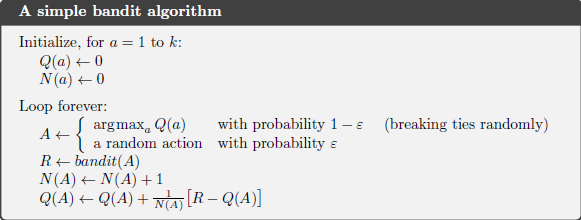

In [393]:
# Definición de función para entrenar a los bandits de acuerdo con la política epsilon-greedy
# input: epsilon (float), num_bandits (int), steps -u horizonte-(int), iter (int)
# output: Recompensa promedio obtenida de cada paso en las diferentes iteraciones, así como el porcentaje de iteraciones en que se selecciona la acción óptima
def epsilon_greedy (epsilon,num_bandits,steps,iter):
        #arreglo para almacenar las recompensas promedio en todo el horizonte
    avg_reward=np.zeros(steps)
        #arreglo para almacenar el conteo de iteraciones en las que se selecciona la acción óptima
    optimal_count=np.zeros(steps)

        #ciclo a través de las iteraciones evalaudas
    for i in range(iter):
            #arreglo para almacenar los valores de cada acción tomada después de seleccionarse n-1 veces
        q_a=np.zeros(n_bandits)
            #arreglo que contabiliza el número de iteraciones evalaudas hasta el momento de evaluación
        n=np.zeros(n_bandits)
            #arreglo que almacena la recompensa total por número de episodios evaluados
        rewards=np.zeros(steps)
            #arreglo que almacena si se encuentra un óptimo (útil para encontrar el porcentaje de encontrar óptimo)
        optimal_found=np.zeros(steps)

            #inicialización de valores q* para la iteración de evaluación        
        q_ini= np.random.normal(mean_q,np.sqrt(variance_q),n_bandits)
            #inicialziación del valor teórico máximo
        max_ini=arg_max(q_ini)

            #ciclo dentro de todos los periodos desde 0 hasta el horizonte
        for s in range(steps):

            act=0 #representa el bandit que se activa en la acción
            if np.random.rand()<epsilon:
                act=int(np.random.randint(num_bandits))
            else:
                act=int(arg_max(q_a))

                #cálculo de la recompensa dado un bandit seleccionado y una varianza definida
            reward_i=f_rewards(q_ini[act],action_var)
            
                #actualiza el n+umero de evaluación de la iteración
            n[act]+=1
                #implementación incremental: permite el aprendizaje 
            q_a[act]+=(reward_i-q_a[act])/n[act]

                #alamcenamiento de la información de la recompensa y el número de iteraciones requeridas para el óptimo
            rewards[s]=reward_i
            if (act==max_ini):
                optimal_found[s]=1
            #cálculo de las métricas establecidas (recompensa y porcentaje de iteraciones en encontrar el óptimo)
        avg_reward +=rewards
        optimal_count +=optimal_found

        #retorna las métricas ponderadas dentro de las _iter_ veces que se evaluó el código    
    out_1=avg_reward/iter
    out_2=optimal_count/iter
    return out_1,out_2



In [394]:
#definición de la lista de epsilon que se quiere evaluar
epsilons=[0.0,0.01,0.1]

#Función para evaluar múltiples valores para epsilon en la uimplementación de epsilon-greedy
def eval_eps(epsilons):
        #arreglos vaciós en dónde se almacenará la información de las diferentes corridas
    avg_r=np.zeros((steps,len(epsilons)))
    optimal_res=np.zeros((steps,len(epsilons)))
        #evalaución de las combinacioens de número de iteraciones y valor de epsilon para la evaluación
    for e in range(len(epsilons)):
        rewards,percent=epsilon_greedy(epsilons[e],n_bandits,steps,iter)
        avg_r[:,e]=rewards
        optimal_res[:,e]=percent   
    return avg_r,optimal_res


steps_arr=np.arange(0,steps,dtype=int)
avg_r,optimal_r=eval_eps(epsilons)

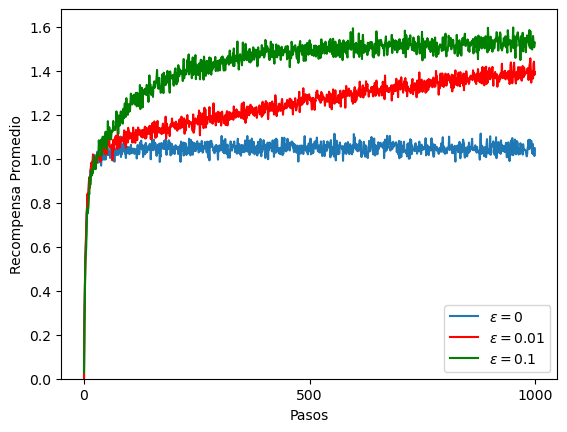

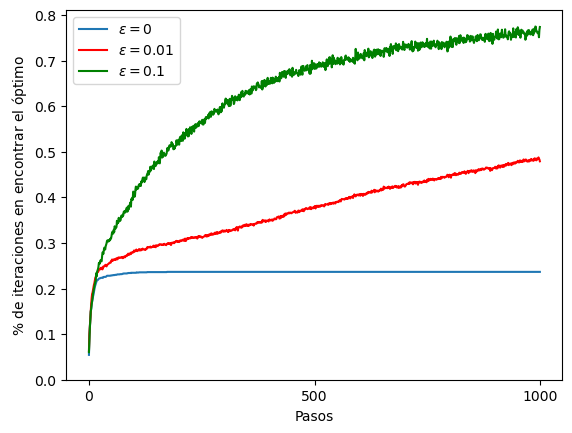

In [395]:
#gráfica para la recompensa
plt.figure()
plt.plot(avg_r[:,0],label=f"$\epsilon=0$")
plt.plot(avg_r[:,1],c="r",label=f"$\epsilon=0.01$")
plt.plot(avg_r[:,2],c="g",label=f"$\epsilon=0.1$")
plt.xticks(range(0,steps+1,500))
plt.xlabel("Pasos")
plt.ylabel("Recompensa Promedio")
plt.ylim(0)
plt.legend()
plt.show()

#Gráfica para el % de iteraciones al óptimo
plt.figure()
plt.plot(optimal_r[:,0],label=f"$\epsilon=0$")
plt.plot(optimal_r[:,1],c="r",label=f"$\epsilon=0.01$")
plt.plot(optimal_r[:,2],c="g",label=f"$\epsilon=0.1$")
plt.xticks(range(0,steps+1,500))
plt.xlabel("Pasos")
plt.ylabel("$\%$ de iteraciones en encontrar el óptimo")
plt.ylim(0)
plt.legend()
plt.show()


### 1.B Gradient Bandit

### 2. Modificación de la varianza en la acción

### 4. No-estacionario